In [1]:
import pandas as pd
import numpy as np
import seaborn
from nltk.corpus import stopwords
from itertools import chain
from nltk.probability import FreqDist

In [2]:
data_read=pd.read_csv("poste_data_scientist_scraped_usa.csv",delimiter=",",header=0)

In [3]:
data_read.head()

,ville,utituler_offre,entreprise,localisation,resume,description
0,New+York,Data Scientist,Geophy,NaN,Proficient in Python or R as well as critical ...,We're already working with some of the largest...
1,New+York,Sr. Data Scientist,MetroPlus Health Plan,NaN,MetroPlus Health Plan provides the highest qua...,"$135,000 - $145,000 a yearMarketing Statement\..."
2,New+York,Junior Data Scientist,Viacom,NaN,"Knowledge of algorithms for data mining, machi...",Overview and Responsibilities\nThe Junior Data...
3,New+York,Data Scientist - Demand Forecasting,Amazon.com,NaN,Data Scientist Responsibilities. In a typical ...,Business/Team Introduction\nThe Amazon Demand ...
4,New+York,Data Scientist,IBM,NaN,"You will work alongside consultants, managers,...",Job Description\nThe smartest companies today ...


## Preprocessing:

On va d'abord enlever ponctuation:

In [4]:
data_read["resume"]= data_read["resume"].str.replace('[^\w\s]','')
data_read["description"]=data_read["description"].str.replace('[^\w\s]','')

In [5]:
data_read.iloc[93,5]

'InternshipAt HPE we bring together the brightest minds to create breakthrough technology solutions and advance the way people live and work Our legacy inspires us as we forge ahead dedicated to helping our customers make their mark on the world\nLearning does not only happen through training Relationships are among the most powerful ways for people to learn and grow and this is part of our HPE culture In addition to working alongside talented colleagues you will have many opportunities to learn through coaching and stretch assignment opportunities Youll be guided by feedback and support to accelerate your learning and maximize your knowledge We also have a reverse mentoring program which allows us to share our knowledge and strengths across our multigeneration workforce\nThe Enterprise Solutions and Performance team is looking for an engineeringdiscipline intern to assist with research and development projects in the data and analytics space focusing on technologies related to develop

Transformer les texts en minuscule

In [6]:
data_read["resume"] = data_read["resume"].apply(lambda x: " ".join(x.lower() for x in np.str(x).split()))
data_read["description"]=data_read["description"].apply(lambda x: " ".join(x.lower() for x in np.str(x).split()))

In [7]:
data_read.iloc[93,5]

'internshipat hpe we bring together the brightest minds to create breakthrough technology solutions and advance the way people live and work our legacy inspires us as we forge ahead dedicated to helping our customers make their mark on the world learning does not only happen through training relationships are among the most powerful ways for people to learn and grow and this is part of our hpe culture in addition to working alongside talented colleagues you will have many opportunities to learn through coaching and stretch assignment opportunities youll be guided by feedback and support to accelerate your learning and maximize your knowledge we also have a reverse mentoring program which allows us to share our knowledge and strengths across our multigeneration workforce the enterprise solutions and performance team is looking for an engineeringdiscipline intern to assist with research and development projects in the data and analytics space focusing on technologies related to developin

On va enlever les stopword ('and','or','the','this',...)

In [8]:
stop = stopwords.words('english')
data_read["resume"] = data_read["resume"].apply(lambda x: " ".join(x for x in np.str(x).split() if x not in stop))
data_read["description"]=data_read["description"].apply(lambda x: " ".join(x for x in np.str(x).split() if x not in stop))

In [9]:
data_read.iloc[93,5]

'internshipat hpe bring together brightest minds create breakthrough technology solutions advance way people live work legacy inspires us forge ahead dedicated helping customers make mark world learning happen training relationships among powerful ways people learn grow part hpe culture addition working alongside talented colleagues many opportunities learn coaching stretch assignment opportunities youll guided feedback support accelerate learning maximize knowledge also reverse mentoring program allows us share knowledge strengths across multigeneration workforce enterprise solutions performance team looking engineeringdiscipline intern assist research development projects data analytics space focusing technologies related developing endtoend intelligent edgetocloud data pipeline consumption data scientists business analysts intern work handson engineers esp data analytics solutions engineering team houston tx work hpe technologies synergy superdome flex apollo edgeline servers well p

Lemmisation des mots

In [56]:
#from textblob import Word
#data_read["resume"] =  data_read["resume"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
#data_read["description"] =  data_read["description"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [10]:
data_read.iloc[93,5]

'internshipat hpe bring together brightest minds create breakthrough technology solutions advance way people live work legacy inspires us forge ahead dedicated helping customers make mark world learning happen training relationships among powerful ways people learn grow part hpe culture addition working alongside talented colleagues many opportunities learn coaching stretch assignment opportunities youll guided feedback support accelerate learning maximize knowledge also reverse mentoring program allows us share knowledge strengths across multigeneration workforce enterprise solutions performance team looking engineeringdiscipline intern assist research development projects data analytics space focusing technologies related developing endtoend intelligent edgetocloud data pipeline consumption data scientists business analysts intern work handson engineers esp data analytics solutions engineering team houston tx work hpe technologies synergy superdome flex apollo edgeline servers well p

In [11]:
data_read.to_csv("data_science_data_clean.csv",index=False)

In [12]:
len([k.lower() for k in data_read.utituler_offre  if "data" in k.lower()])

11374

## Analyse descriptif:

Tout d'abord, on va faire une fonction qui va retourner un dataframe contenant la liste des mots comme rowname et comme colonne les occurences. 

In [13]:
from collections import Counter
import nltk
tokenizer = nltk.RegexpTokenizer(r'\w+')
def word_count_text(List_text,N_min=7500,tokenizer_true=False):
    #bag_of_word=[]
    der="".join(List_text)
    tokens = nltk.word_tokenize(" ".join(List_text))
    fdist=FreqDist(tokens)
    #if tokenizer_true:
    #    bag_of_word=[tokenizer.tokenize(k) for k in List_text]
    #else:
    #    bag_of_word=[k.split(" ") for k in List_text]
        
    ## Compter le nombre d'occurence des mots
    dict_word=dict(fdist)
    # On enregistre les mots dans un dataframe
    pd_dict_word=pd.DataFrame(list(dict_word.values()),index=dict_word.keys(),columns=["occurence"])
    pd_dict_word=pd_dict_word.sort_values(by="occurence",ascending=False)
    ## On filtre les mots dont l'occurence sont supérieurs à N_min
    pd_dict_word=pd_dict_word.loc[pd_dict_word.occurence>N_min,:]
    # on retourne un dataframe
    return pd_dict_word

## Bag of word:
Dans cette partie, on va contruire notre sac de mot d'une part, et d'autre part, on va aussi compter le nombre de fois où revient un mot.Ici on ne va conciderer que les mots ayant comme occurence plus de 7500 fois. 

In [14]:
description=data_read.description.tolist()
pd_dict_word= word_count_text(description)

## Visualisation de l'occurence des mots par un diagramme en bar:

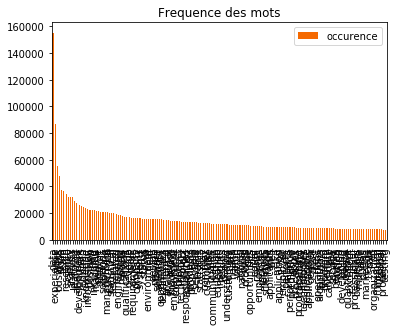

In [15]:
pd_dict_word.plot(kind='bar', color="#f56900", title='Frequence des mots');

Pour avoir une visualisation de nos données de façon assez concret, on va faire un wordclouding:

In [16]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt 
comment_words =""
for single in data_read['description']:
    comment_words = str(comment_words)
    comment_words += single


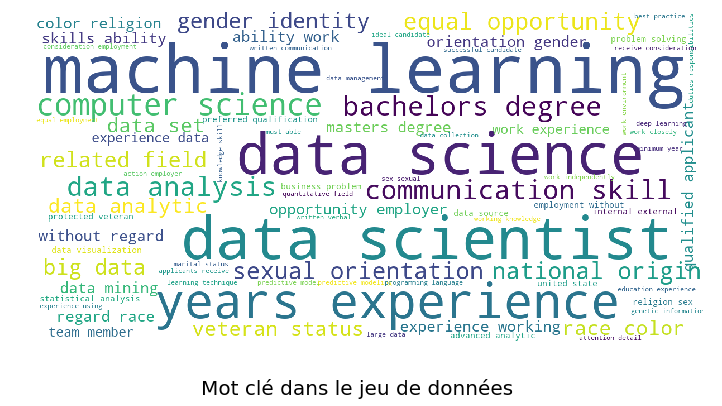

In [17]:
stopwords = set(STOPWORDS) 
def show_wordcloud(data,stopwords=stopwords,title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(comment_words,title="Mot clé dans le jeu de données")

## word clue:
Dans cette partie, on va étudier les mots clés que l'on considère être des mots  clés connus dans le domaine de la data science. On va tout d'abord étudier les mots liés au outils utilisés dans le domaine de la data science. Pour le logiciel r on va mettre des espaces avant et après la lettre r pour ne pas considérer les lettres r dans d'autres mots

In [18]:
Mot_cle_technique = ['python','r',"rstudio",'sql','java','scala','excel',
        'aws','hadoop','spark','linux','tableau','sas',"nosql",
               'linux','sas','hive','oracle','perl',
               'mysql','matlab','html','tensorflow','spss','mongodb',"c++"]

In [19]:
pd_dict_word_all=word_count_text(description,N_min=0)
pd_dict_word_all.loc[pd_dict_word_all.index=="sas",:"occurence"]

,occurence
sas,4529


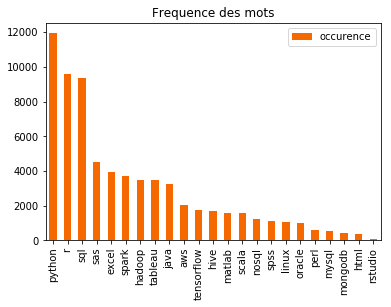

In [20]:
bol=[True if k in Mot_cle_technique else False for k in pd_dict_word_all.index ]
#pd_dict_word_all.loc[,:"occurence"]
mot_outils=pd_dict_word_all[bol]
mot_outils.plot(kind='bar', color="#f56900", title='Frequence des mots');

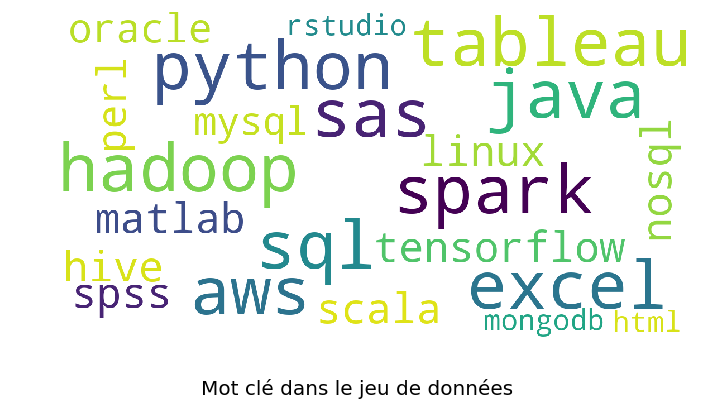

In [21]:
comment_words=""
for words in mot_outils.index: 
    comment_words = comment_words + words + ' '

show_wordcloud(comment_words,title="Mot clé dans le jeu de données")

## Filtre sur les postes qu'on data:

In [22]:
bolean=[True if "data" in k.lower() else False for k in data_read.utituler_offre]

In [23]:
data_filtered=data_read[bolean]

In [24]:
data_filtered.head()

,ville,utituler_offre,entreprise,localisation,resume,description
0,New+York,Data Scientist,Geophy,NaN,proficient python r well critical scientific n...,already working largest real estate lenders in...
1,New+York,Sr. Data Scientist,MetroPlus Health Plan,NaN,metroplus health plan provides highest quality...,135000 145000 yearmarketing statement metroplu...
2,New+York,Junior Data Scientist,Viacom,NaN,knowledge algorithms data mining machine learn...,overview responsibilities junior data science ...
3,New+York,Data Scientist - Demand Forecasting,Amazon.com,NaN,data scientist responsibilities typical day wo...,businessteam introduction amazon demand foreca...
4,New+York,Data Scientist,IBM,NaN,work alongside consultants managers data scien...,job description smartest companies today fully...


## Revisualisation des données:

In [25]:
description=data_filtered.description.tolist()
pd_dict_word= word_count_text(description,N_min=3500)

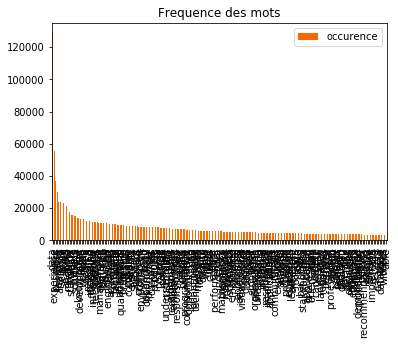

In [26]:
pd_dict_word.plot(kind='bar', color="#f56900", title='Frequence des mots');

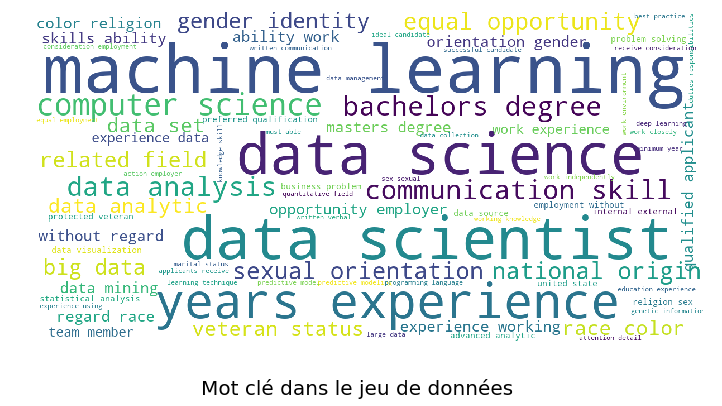

In [27]:
comment_words =""
for single in data_read['description']:
    comment_words = str(comment_words)
    comment_words += single
show_wordcloud(comment_words,title="Mot clé dans le jeu de données")

## Outils en data science:

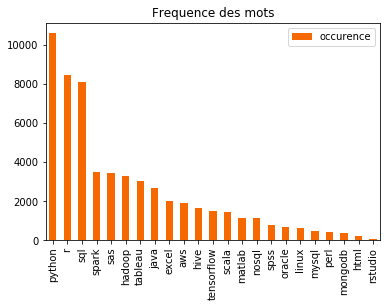

In [28]:
pd_dict_word_all=word_count_text(description,N_min=0)
bol=[True if k in Mot_cle_technique else False for k in pd_dict_word_all.index ]
mot_outils=pd_dict_word_all[bol]
mot_outils.plot(kind='bar', color="#f56900", title='Frequence des mots');

In [29]:
data_filtered.shape

(11374, 6)

Lorsqu'on a filtré, on remarque des petites changements sur la frequence d'utilisation des outils.

In [30]:
data_filtered.to_csv("data_science_filtered_job.csv",index=False)

In [31]:
data_read.shape

(19253, 6)